<p><img style="padding: 0 15px; float: left;" src="Images/FTLogo300.jpg" alt="FT Crusader Logo" Width='140' Height= '250'/></p> 
<p> <h2> Frogtown/Saint Paul Traffic Stop Code; 04/07/19</h2> <a name="tc"></a>
<p> <h3> By Frogtown Crusader (Abu Nayeem)</h3>

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
    * [Standard](#standard)
    * [Longitudinal](#longitudinal)
    * [Commerical](#commerical)
    * [Geo-Spatial Prep](#geo_prep)
    * [Frogtown_Geo-Spatial](#fg_geo)
    * [Saint Paul Geo-Spatial](#sp_geo)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

**Disclaimer:** This is my Coursera Capstone Project for Data Science. Also, I will be using the term "Black" instead of African American because that is the race indicator provided from the dataset and the category also includes persons of African origin (substantial minority). 

### About Me:
I'm a Frogtown resident, community advocate, programmer. I will like to use open-source data to be share stories and create action. Please follow me on [Github](https://github.com/sustainabu) 

### Purpose:

Currently in the United States, there is alot of tension between law enforcement, and the public. I will be looking into the Traffic Stop Data for Saint Paul, Minnesota (USA) provided by the Saint Paul Police Department (SPPD). Analyzing the traffic stop data can provide evidence (or lack thereof) of systemic biases. The goal of my report to add insight on what is happening in my community, Thomas-Dale neighborhood aka Frogtown, as well as advocate citizens to use open source data and/or demand their public agencies to provide such data. 
    
### Executive Summary:

There are certain parts of Frogtown that have greater frequency of traffic stops compared to rest of the neighborhood, particularly along University University Avenue.The data **suggests** targeting of Black drivers given that they are stopped more frequently, searched more frequently per stop, and less likelihood to receive a citation. Some other data insights include that moving violation stops are given mostly in the morning and have a higher citation rate. In contrast, during the late night hours, there are greater instances of equipment violations. Furthermore, there seems to be many communities, including Frogtown that have considerable instances of equipment violations.
    

### Why prove the obvious?

The results may be obvious, but proving it may be more challenging. As a researcher, my goal is to measure the impact, seek the truth, explore, and challenge my expectations. Data can be the great equalizer challenging our worldviews and/or reinforcing our existing perspective. Data reports can be used to share stories and information effectively. Furthermore, data is used as an evaluation tool to determine the effectiveness of programs and policies.

Thus data practitioners, more broadly institutions, hold strong responsibility and influence in shaping the data in support a certain narrative. In our current political climate, the public perception on law enforcement is polarized and I hope these studies can shed light on the issues. This report and other will be available via open source, allowing others to contribute, replicate, use code for their own respective neighborhood.
    

## About Saint Paul

The City of Saint Paul is the second largest city in Minnesota, USA, and is the capital city for the state. Saint Paul is often paired with their nearby city, Minneapolis, where they are aptly named, The Twin Cities. It has roughly over 300,000 people and the city itself is quite diverse. Minnesota has a high level of [racial inequity](http://www.citypages.com/news/minnesota-still-has-some-of-the-worst-racial-disparities-in-the-nation/504390741) ranking 47th of 51st compared to rest of the United States. Saint Paul is broken down to seventeen Planning Districts, created in 1979 to allow neighborhoods to participate in governance and use Community Development Block Grants. The Thomas/Dale neighborhood is one of the district planning councils. A few years ago, a tragic police fatal shooting of African-American male, [Philando Castile](https://en.wikipedia.org/wiki/Shooting_of_Philando_Castile), occurred during a traffic stop in the suburbs of Saint Paul, Falcon Heights, which has increased tension within the community between law enforcement and citizens. 


## About Thomas-Dale-Frogtown Neighborhood

The Frogtown community has historically been a transitional community with new immigrant/refugee communities living in the neighborhood for short period of time. From my experience, Frogtown boasts considerable diversity respect to language, culture, and ethnicity. In recent times, it has been historically poor. Here is a snapshot of the community  exported from [Minnesota Compass](https://www.mncompass.org/profiles/neighborhoods/st-paul/frogtown-thomas-dale) based on 2017 Census Demographic Data.

![title](Images/fg_Race11.png)

![title](Images/fgInc1.png)


### Frogtown Community Information

The image below displays the Frogtown Community using the police grid (matches well with actual boundaries). On the southern boundary of Frogtown is University Avenue, where the Light Rail Transportation runs along the boundary and it is a heavy residential street as well. I will emphasize more noticeable landmarks once plugging in the 4-square data. The two rightmost sectors are respectfully Mt. Airy and Capitol Heights. These two communities are considered distinct by community members. 

![title](Images/FG_Grid.png)



## Data <a name="data"></a>

    
### About the Datasets:

The dataset contains SPPD traffic stop collected by SSPD from 2000 to 2018 via agreement of the Saint Paul chapter of the NAACP and can be accessed [here](https://information.stpaul.gov/Public-Safety/Traffic-Stop-Dataset/kkd6-vvns). The website have a lot of features and visualizations for basic analysis, but for advanced users data transformations are not available/ limited. I have chosen to select years from 2017 to 2018 based on data limitations.

Data Features:
* Individual Traffic Stop Data
* Driver characteristics
    - Gender, Age (if recieve citation), and Race 
    - Was the driver searched, vehicle searched, and/or recieve a citation?
* GeoCoordinates of center of police grid and timestamp for

Data limitation as explain on the website:
* Reason for stop (available starting in 2017)
    - Include Moving Violation, Equipment Violation, Investigative Stop, and 911 call
* Data reflects traffic stops originating by St. Paul Police Officers
* Race is based on officers’ perceptions
* Fields indicating “No Data” may be due to a variety of factors, including:
    - Age data is only collected when a citation is issued
    - Reason for stop data was not collected before 2017
    - Technology changes over time/ Technical Errors/ Lack of Available information

* Supplemental Info Suggested by Author
    - [Traffic Crashes by Police Grid 2018](https://www.stpaul.gov/sites/default/files/Media%20Root/Police/Traffic%20Crashes%20in%20Saint%20Paul%202018.pdf)
    - [Traffic Stops by Police Grid 2018](https://www.stpaul.gov/sites/default/files/Media%20Root/Police/2018%20Traffic%20Stops.pdf)
    - [911 Calls by Police Grid 2018](https://www.stpaul.gov/sites/default/files/Media%20Root/Police/911%20Calls%20in%20Saint%20Paul%202018.pdf)

The dataset consist of each record of driver being stopped, but the locations coordinates are limited to the police grid coordinates. There is maybe over 90 or so police grids! 

![title](Images/policegrid.png)

#### Four-Square API Dataset

I'll be using the Four-square API to get information on local businesesses. Some street/ and areas might be more active than others

#### Minnesota Compass 2017 Census Survey Data

The Minnesota Compass offers raw data for both Minneapolis and Saint Paul districts. They are a non-partisan group.

### Data Prep

The primary data will range from 2017-18. The longitudinal analysis will have data from 2001 to 2018.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import plotly
from IPython.display import HTML
from IPython.display import display
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sodapy import Socrata

#New Upload Method Get Information from Socrata API
client = Socrata("information.stpaul.gov", None)

#Data Load
#df = pd.read_csv('Data/Traffic_Stop_Dataset.csv')
#More familar column names Column Names
#cols= ['Year','Date','Race','Gender','Driver_search','Vehicle_search','Citation','Age','Reason','Grid','GridLocation', 'Count']
#df.columns= cols

results = client.get("kkd6-vvns", limit=1000000)
results_df = pd.DataFrame.from_records(results)

#rename columns
cols= ['Gunk', 'Gunk2', 'Gunk3','Age','Citation', 'Count', 'Date','Driver_search','Gender','GridLocation', 'Grid','Race','Reason','Vehicle_search','Year']
results_df.columns= cols
results_df =results_df.iloc[:,3:]
#change datatypes
results_df = results_df.astype({"Year": int, "Age": float, "Grid":float, "Count":int})

#We will be choosing from 2017 to 2018 because there a reason given for traffic stop
df= results_df.query('Year in [2018,2017,2019]')

df.shape

(63743, 12)

First, I will be creating some **functions** that will make data transformations easier; such as creating an AgeBin, Neighborhood Designation, and Policing District Designation

In [3]:
#Community function
def commun(x): 
    if x in [67,68,87,88,89,90,91,92]:
        return 'Thomas_Frogtown'
    elif x in [5,6,7,8,25,26,27,28,45,46,47,48]:
        return 'Como'
    elif x in [107, 108, 109, 110,127,128,129,130]: 
        return 'Summit_University'
    elif x in [101,102,103,104,105,106,122,123,124,125,126]: 
        return 'Union_Park'
    elif x in [63,64,65,66,83,84,85,86]: 
        return 'Midway' 
    elif x in [142,143,144,145,146,162,163,164,165,166]:
        return 'Macalester_Groveland'
    elif x in [182,183,184,185,186,202,203,204,205,206,223,224,225,242,243,244,245,246]:
        return 'Highland_Park'
    elif x in [147,148,149,167,168]:
        return 'Summit_Hill'
    elif x in [1,2,21,22,43,44,61,62,81,82]:
        return 'St_Anthony'
    elif x in [226,207,187,188,189,267,268,169,170,171,249,150,151,230,367]:
        return 'West_7th'
    elif x in [209,210,211,212,213,214,215,192,193,194,195,172,173,174,175]:
        return 'West_Side'
    elif x in [111,112,131,132,133,152,153]:
        return 'Capital_River'
    elif x in [98,99,100,118,119,119,120,137,138,139,140,160,197,180,200,240,280]:
        return 'Battle_Creek'
    elif x in [76,95,96,97,115,116,117,138,114,136]:
        return 'Dayton_Bluff' 
    elif x in [9,10,11,12,29,30,31,32,49,50,51,52,269,69,70,71,72]:
        return 'North_End'
    elif x in [13,14,15,16,33,34,35,36,53,54,55,56,73,74,75,93,94]:
        return 'Payne_Phalen'
    elif x in [17,18,19,20,37,38,39,40,56,57,58,59,60,77,78,79,80]:
        return 'Greater_East_Side'
    else: 
        return 'NaN'

#District Function    
    
def district(x):
    if x in [1,2,3,4,5,6,7,8,21,22,23,24,25,26,27,28,43,44,45,46,47,48,\
            61,62,63,64,65,66,67,68,269,81,82,83,84,85,86,87,88,89,\
            101,102,103,104,105,106,107,108,109,110,122,123,124,125,126,\
            127,128,129,130,142,143,144,145,146,147,148,149,149,\
            162,163,164,165,166,167,168,182,183,184,185,186,\
            202,203,204,205,206,223,224,225,242,243,244,245,246]:
        return 'Western'
    elif x in [9,10,11,12,29,30,32,31,49,50,51,52,69,70,71,72,\
              90,91,92,111,112,131,132,133,267,268,249,130,230,\
              150,151,152,153,169,170,171,172,173,174,175,207,209,226,\
              187,188,189,192,193,194,195,210,211,212,213,214,215]:
        return 'Central'
    elif x in [13,14,15,16,17,18,19,20,33,34,35,36,37,38,39,40,\
              53,54,55,56,57,58,59,60,73,74,75,76,77,78,79,80,\
              93,94,95,96,97,98,99,100,114,115,116,117,118,119,120,\
              136,137,138,139,140,160,197,180,200,240,280]:
        return 'Eastern'
    else:
        return 'NaN'
    
# Define Age Function bins
def agef(x):
    if x<19: 
        return 'Teen <19'
    elif x>18 and x<25: 
        return 'Young Adult 19-24'
    elif x>25 and x<31: 
        return 'Adult 26-30'
    elif x>30 and x<46: 
        return 'Middle Adult 31-45' 
    elif x>45: 
        return 'Older Adult 46+' 
    else: 
        return 'NaN'    

## Data Cleaning/Wrangling

I will be constructing several variables. Originally, I wanted to extract gridlocation coordinates from the dataset, but it makes more sense to connect the grid to a json file. The manipulations and additions are listed below:

1. Convert time variable to datetime; Extract Month, DayofWeek, Weekend, Hour
2. I've constructed a variable **LateNight** which denotes if a stop occured between 10:00PM to 5:00AM
3. Converted several variables to integers; Note: Female is designated as 1  
4. Converted some descriptive columns to dummy variables
5. Extracted Latitude and Longitude in separate columns for each police grid


**Initial Omissions**

* The demographic 'Native American' was excluded because the numbers were too small.
* There are empty cells under the 'No Data' Category
* The two reasons, '911 call', and 'Investigative Stop' were excluded because they were small numbers and not relevant to study; See  below 
* Finally, any data entries not belonging to a community were excluded. It's possible that some stops occurred outside Saint Paul jursidiction. These data points were excluded
* Driver being search and vehicle being searched is strongly correlated, so exclude vehicle search in analysis


In [29]:
df.Reason.value_counts()

Moving Violation               48229
Equipment Violation            12040
Investigative Stop              2199
No Data                          139
911 Call / Citizen Reported      136
Name: Reason, dtype: int64

In [4]:
#Prepping the Primary Dataset

#Add District Plannning Council and District columns from Functions
df['Community']= df['Grid'].apply(commun)
df['District']= df['Grid'].apply(district)
df['AgeDemo']= df['Age'].apply(agef)

#Add Time Variables
df['Date']= pd.to_datetime(df['Date'])
df['DayofWeek']=df['Date'].dt.dayofweek
df['Weekend'] = df['DayofWeek'].apply(lambda x: 1 if (x>4)  else 0)
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['LateNight'] = df['Hour'].apply(lambda x: 1 if (x>21 or x<5)  else 0)

#Screening
df= df[df.Reason != '911 Call / Citizen Reported']
df= df[df.Reason != 'No Data']
df= df.loc[df['Reason'] != 'Investigative Stop']
df= df.loc[df['Race'] != 'Native American']

#Replace variables with dummies
df['Driver_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Vehicle_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Citation'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) #FEMALE is 1

df= pd.concat([df,pd.get_dummies(df['Reason'])], axis=1)
df= pd.concat([df,pd.get_dummies(df['Race'])], axis=1)

#Let Logitiude and Latitude
## I conldn't figure out how to utilize the dictionary, so I just converted it to a string
# Separate Latitude and Longitude 
df['GridLocation'] = df['GridLocation'].astype('str') 

#Get Latitude
new=df['GridLocation'].str.split("',", n = 1, expand = True) 
# making seperate first name column from new data frame
lat=new[0].str.split(" '", n = 1, expand = True)
df['Latitude']= pd.to_numeric(lat[1]) 

#Get Longtitude
long= new[1].str.split(": '", n = 1, expand = True)
long[1]
df['Longitude']= pd.to_numeric(long[1].str.rstrip("'}"))

#Use if need to change variables ot integers
#df[['Dr_search', 'V_search',  'Citation']] = df[['Dr_search', 'V_search', 'Gender','Citation']].astype(int)

# Remove any missing community data entries
df= df[df.Community != 'NaN']


df.head()

Age  Citation  Count                Date  Driver_search  Gender  \
0  NaN         0      1 2018-12-31 23:57:00              0       0   
1  NaN         0      1 2018-12-31 23:46:00              0       0   
3  NaN         0      1 2018-12-31 23:24:00              0       0   
5  NaN         0      1 2018-12-31 23:06:00              0       0   
6  NaN         0      1 2018-12-31 23:05:00              0       0   

                                        GridLocation   Grid   Race  \
0  {'latitude': '44.953079049', 'longitude': '-93...  102.0  Black   
1  {'latitude': '44.931040586', 'longitude': '-93...  192.0  White   
3  {'latitude': '44.966643264', 'longitude': '-93...   74.0  Asian   
5  {'latitude': '44.981075257', 'longitude': '-93...   35.0  Black   
6  {'latitude': '44.959806616', 'longitude': '-93...   98.0  Asian   

                Reason  ...  LateNight  Equipment Violation Moving Violation  \
0     Moving Violation  ...          1                    0                1   
1  Equipment Violation  ...          1                    1                0   
3     Moving Violation  ...          1                    0                1   
5     Moving Violation  ...          1                    0                1   
6     Moving Violation  ...          1                    0                1   

  Asian Black  Latino  Other  White   Latitude  Longitude  
0     0     1       0      0      0  44.953079 -93.194201  
1     0     0       0      0      1  44.931041 -93.095200  
3     1     0       0      0      0  44.966643 -93.071032  
5     0     1       0      0      0  44.981075 -93.061206  
6     1     0       0      0      0  44.959807 -93.031017  

[5 rows x 30 columns]

## Data Methodology <a name="methodology"></a>

I'll be exploring the dataset through multiple angles: longitudinal, geo-spatial, and in-depth analysis from 2017-18. I will be focusing primarily on racial discrimination. I will be mostly be using data visualization, a predictive model would be inappropiate as the data is mostly binary.

#### Standard Analysis

There are several methods/considerations/limitations in testing for racial biases; : 
1. At the first layer (shallow level), are certain drivers being selected more than others? There can be many explainations for discrepancies that may not be discrimination
2. At the second layer, are 'certain' drivers being treated differently. For example, do women drivers get less citations?
3. Are certain racial groups treatment stand out compared to their peers?
4. Are there external factors, such as venues, local bars, and congested traffic areas that may influence outcome?
5. Racial idenitification is imperfect given that this is determined by officers and certain persons are mixed heritage

The primary analysis will focus on the second later, I'll be create a **master table** that collects the groupby values; conditioned on race.

My analysis will be focusing primarily on treatment:

* **'Eq'** stands for Equipment Violation; and **'Mov'** indicates Moving Violation

* Most of the values are normalized from [0 to 1] and conditioned on Racial identity; Examples provided below

How to read results:

* Eq_Margin of the Asian group indicates the percentage 'Equipment Violation' respect to all stops conditioned on being asian. So a value 0.24 would indicate that 24% of stops for Asians were for Equipment Violations.

* Eq_Citation of 0.4 for Asian drivers indicates that 40% of Asian driver recieved a citation for equipment violations conditioned on being asian.

* Mov_DriverSearch of 0.15 for Asians indicates that 15% of Asian drivers were searched during a Moving Violation conditioned on being Asian

* Mov_Gender_F of 0.55 for Asians indicates that 55% of Asian women are stopped for Moving Violations conditioned on being women.

* Eq_LateNight of 0.25 for Asians indicate that 25% of Asian drivers are stopped for Equipment Violation during latenight conditioned on being Asian

* Morn_Citation of 0.2 for Asians indicate that 20% of Asian drivers recieved during the daytime conditioned of being Asian


#### Longitudinal Analysis

Are there any trends throughout the years?

#### Commercial Analysis

Does the number of stores and type of stores influence the neighborhood? We'll see this visually.

#### Geo-Spatial Analysis

How does Frogtown compare to their neighbors?

## Analysis <a name="analysis"></a>

### Standard Analysis <a name="standard"></a>
My strategy below is to create to save the group by values into a single table; the sort index allows the data to be formated in a way to predict patterns. The original code was more bulky, you can see it in the excess section

In [5]:
#Empty Data table setup
data = [['Asian',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Black', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Latino', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Other', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
       ['White',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Total/Average',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5]] 
         

Race_Grp = pd.DataFrame(data, columns= ['Race','Tot_Count','Eq_Count','Mov_Count','Eq_Margin','Mov_Margin','Citation_Count','Eq_Citation',\
                                      'Mov_Citation','Driversearch_Count','Eq_DriverSearch','Mov_DriverSearch',\
                                      'Eq_Gender_F','Mov_Gender_F','LateNight_Count','Eq_LateNight','Mov_LateNight',\
                                      'Morn_Citation','Late_Citation'])

Race_Grp.set_index('Race', inplace=True)

#Specify Frogtown
rf=df.query("Community=='Thomas_Frogtown'")

**Note:** The code is sensitive to the ordering of columns

In [6]:
#procedure: Run this line of code to check patterns 
#round(rf['Race'].value_counts().sort_index(level=1),4)

RR= ['Asian','Black','Latino','Other','White']
for i,j in enumerate(RR):
    Race_Grp.set_value(j,'Tot_Count', round(rf['Race'].value_counts().sort_index(level=1),4)[i])
    Race_Grp.set_value(j,'Eq_Count', round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)[i])
    Race_Grp.set_value(j,'Mov_Count', round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)[i+len(RR)])
    Race_Grp.set_value(j,'Eq_Margin', round(rf.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)[i])
    Race_Grp.set_value(j,'Mov_Margin', round(rf.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)[i +len(RR)])
    Race_Grp.set_value(j,'Citation_Count',round(rf.groupby(['Race'])['Citation'].value_counts().sort_index(level=1),4)[i+len(RR)])
    Race_Grp.set_value(j,'Eq_Citation', round(rf.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)[2*i+10])
    Race_Grp.set_value(j,'Mov_Citation', round(rf.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)[2*i+11])
    Race_Grp.set_value(j,'Driversearch_Count', round(rf.groupby(['Race'])['Driver_search'].value_counts().sort_index(level=1),4)[i+len(RR)])    
    Race_Grp.set_value(j,'Eq_DriverSearch', round(rf.groupby(['Race','Reason'])['Driver_search'].value_counts(normalize=True).sort_index(level=2),4)[i*2+10])
    Race_Grp.set_value(j,'Mov_DriverSearch', round(rf.groupby(['Race','Reason'])['Driver_search'].value_counts(normalize=True).sort_index(level=2),4)[i*2+11])
    Race_Grp.set_value(j,'Eq_Gender_F', round(rf.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)[i*2+10])
    Race_Grp.set_value(j,'Mov_Gender_F', round(rf.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)[i*2+11])
    Race_Grp.set_value(j,'LateNight_Count', round(rf.groupby(['Race'])['LateNight'].value_counts().sort_index(level=1),4)[i +len(RR)])
    Race_Grp.set_value(j,'Eq_LateNight', round(rf.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)[i*2+10])
    Race_Grp.set_value(j,'Mov_LateNight', round(rf.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)[i*2+11])
    Race_Grp.set_value(j,'Morn_Citation', round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)[i*2+10]) 
    Race_Grp.set_value(j,'Late_Citation', round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)[i*2+11]) 

#Include Total/Avg Variables; #NOTE: the order
E=rf[rf.Reason == 'Equipment Violation'].sum() #2 /3
M=rf[rf.Reason == 'Moving Violation'].sum()#2 /3
Mo= rf[rf.LateNight == 0].sum()
L=rf[rf.LateNight == 1].sum()    
    
Race_Grp.set_value('Total/Average','Tot_Count',rf.count()[1])    
Race_Grp.set_value('Total/Average','Eq_Count',rf[rf.Reason == 'Equipment Violation'].count()[1]) 
Race_Grp.set_value('Total/Average','Mov_Count',rf[rf.Reason == 'Moving Violation'].count()[1]) 
Race_Grp.set_value('Total/Average','LateNight_Count',rf[rf.LateNight == 1].count()[1]) 
Race_Grp.set_value('Total/Average','Citation_Count',rf[rf.Citation == 1].count()[1]) 
Race_Grp.set_value('Total/Average','Driversearch_Count',rf[rf.Driver_search == 1].count()[1])
Race_Grp.set_value('Total/Average','Eq_Margin',E[2]/rf.count()[1])
Race_Grp.set_value('Total/Average','Mov_Margin',M[2]/rf.count()[1])
Race_Grp.set_value('Total/Average','Eq_Citation',E[1]/E[2])
Race_Grp.set_value('Total/Average','Mov_Citation',M[1]/M[2])
Race_Grp.set_value('Total/Average','Eq_DriverSearch',E[3]/E[2])
Race_Grp.set_value('Total/Average','Mov_DriverSearch',M[3]/M[2])
Race_Grp.set_value('Total/Average','Eq_Gender_F',E[4]/E[2])
Race_Grp.set_value('Total/Average','Mov_Gender_F',M[4]/M[2])
Race_Grp.set_value('Total/Average','Eq_LateNight',E[19]/E[2])
Race_Grp.set_value('Total/Average','Mov_LateNight',M[19]/M[2])
Race_Grp.set_value('Total/Average','Morn_Citation',Mo[1]/Mo[2])
Race_Grp.set_value('Total/Average','Late_Citation',L[1]/L[2])

Race_Grp
#round(rf['Race'].value_counts().sort_index(level=1),4)

Tot_Count  Eq_Count  Mov_Count  Eq_Margin  Mov_Margin  \
Race                                                                   
Asian                687       162        525   0.235800    0.764200   
Black               2687       971       1716   0.361400    0.638600   
Latino               238        80        158   0.336100    0.663900   
Other                360        95        265   0.263900    0.736100   
White               1486       346       1140   0.232800    0.767200   
Total/Average       5458      1654       3804   0.303041    0.696959   

               Citation_Count  Eq_Citation  Mov_Citation  Driversearch_Count  \
Race                                                                           
Asian                     311     0.253100      0.514300                  30   
Black                     911     0.219400      0.406800                 379   
Latino                    100     0.187500      0.538000                  21   
Other                     135     0.242100      0.422600                  22   
White                     762     0.190800      0.610500                  97   
Total/Average            2219     0.216445      0.489222                 549   

               Eq_DriverSearch  Mov_DriverSearch  Eq_Gender_F  Mov_Gender_F  \
Race                                                                          
Asian                 0.055600          0.040000     0.234600       0.33900   
Black                 0.151400          0.135200     0.311000       0.32400   
Latino                0.137500          0.063300     0.337500       0.29110   
Other                 0.063200          0.060400     0.389500       0.33210   
White                 0.124300          0.047400     0.355500       0.40180   
Total/Average         0.130593          0.087539     0.318622       0.34858   

               LateNight_Count  Eq_LateNight  Mov_LateNight  Morn_Citation  \
Race                                                                         
Asian                      216      0.506200       0.255200       0.554100   
Black                     1271      0.577800       0.413800       0.471000   
Latino                      82      0.487500       0.272200       0.519200   
Other                      144      0.568400       0.339600       0.481500   
White                      444      0.554900       0.221100       0.644000   
Total/Average             2157      0.561064       0.323081       0.540442   

               Late_Citation  
Race                          
Asian               0.231500  
Black               0.192000  
Latino              0.231700  
Other               0.215300  
White               0.205000  
Total/Average       0.201669

In [7]:
F=['Tot_Count','Eq_Count','Mov_Count','Eq_Margin','Mov_Margin', 'Eq_Gender_F','Mov_Gender_F']
Race_Grp[F]

Tot_Count  Eq_Count  Mov_Count  Eq_Margin  Mov_Margin  \
Race                                                                   
Asian                687       162        525   0.235800    0.764200   
Black               2687       971       1716   0.361400    0.638600   
Latino               238        80        158   0.336100    0.663900   
Other                360        95        265   0.263900    0.736100   
White               1486       346       1140   0.232800    0.767200   
Total/Average       5458      1654       3804   0.303041    0.696959   

               Eq_Gender_F  Mov_Gender_F  
Race                                      
Asian             0.234600       0.33900  
Black             0.311000       0.32400  
Latino            0.337500       0.29110  
Other             0.389500       0.33210  
White             0.355500       0.40180  
Total/Average     0.318622       0.34858

In [8]:
G=['Citation_Count','Eq_Citation','Mov_Citation','Driversearch_Count','Eq_DriverSearch','Mov_DriverSearch',]
Race_Grp[G]


Citation_Count  Eq_Citation  Mov_Citation  Driversearch_Count  \
Race                                                                           
Asian                     311     0.253100      0.514300                  30   
Black                     911     0.219400      0.406800                 379   
Latino                    100     0.187500      0.538000                  21   
Other                     135     0.242100      0.422600                  22   
White                     762     0.190800      0.610500                  97   
Total/Average            2219     0.216445      0.489222                 549   

               Eq_DriverSearch  Mov_DriverSearch  
Race                                              
Asian                 0.055600          0.040000  
Black                 0.151400          0.135200  
Latino                0.137500          0.063300  
Other                 0.063200          0.060400  
White                 0.124300          0.047400  
Total/Average         0.130593          0.087539

In [9]:
H=['LateNight_Count','Eq_LateNight','Mov_LateNight','Morn_Citation','Late_Citation']
Race_Grp[H]

LateNight_Count  Eq_LateNight  Mov_LateNight  Morn_Citation  \
Race                                                                         
Asian                      216      0.506200       0.255200       0.554100   
Black                     1271      0.577800       0.413800       0.471000   
Latino                      82      0.487500       0.272200       0.519200   
Other                      144      0.568400       0.339600       0.481500   
White                      444      0.554900       0.221100       0.644000   
Total/Average             2157      0.561064       0.323081       0.540442   

               Late_Citation  
Race                          
Asian               0.231500  
Black               0.192000  
Latino              0.231700  
Other               0.215300  
White               0.205000  
Total/Average       0.201669

### Plotting 

We will be taking the results from previous section and graphing it

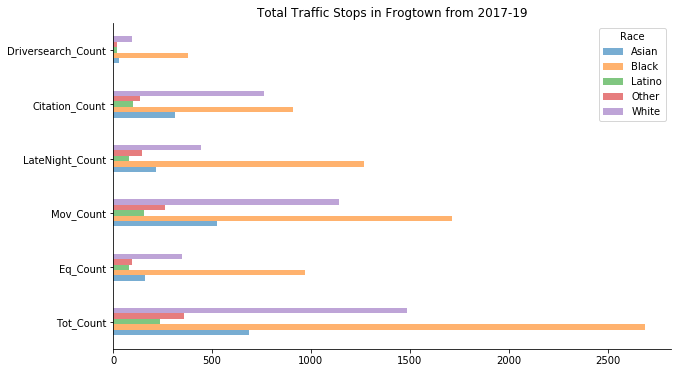

In [15]:
# Graph Based on Counts

#Select Features
Features= ['Tot_Count','Eq_Count', 'Mov_Count','LateNight_Count', 'Citation_Count','Driversearch_Count']
df_t= Race_Grp[Features][:-1]
df_t = df_t.transpose()
#print(df_t)

#Plotting
ax= df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)


plt.title('Total Traffic Stops in Frogtown from 2017-19')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

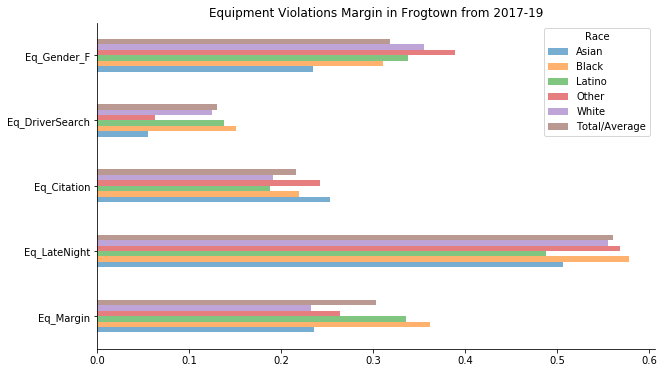

In [14]:
# Graph on Equipment Violations

#Select Features
Features= ['Eq_Margin','Eq_LateNight','Eq_Citation','Eq_DriverSearch','Eq_Gender_F']
df_t= Race_Grp[Features]
df_t = df_t.transpose()
#print(df_t)

#Plotting
ax=df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Equipment Violations Margin in Frogtown from 2017-19')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

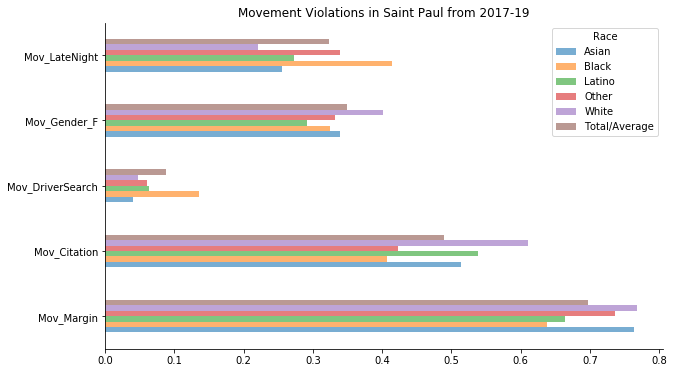

In [13]:
# Graph Based on Movement Violations

#Select Features
Features= ['Mov_Margin','Mov_Citation','Mov_DriverSearch','Mov_Gender_F','Mov_LateNight' ]
df_t= Race_Grp[Features]
df_t = df_t.transpose()
#print(df_t)

#Plotting
ax=df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Movement Violations in Saint Paul from 2017-19')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

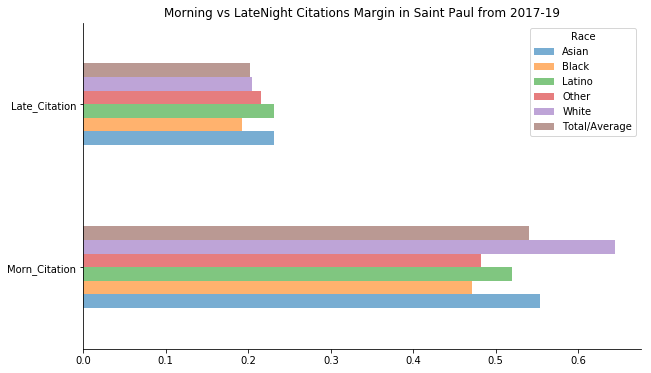

In [16]:
# Graph Based on Morning and Latenight Citations

#Select Features
Features= ['Morn_Citation','Late_Citation']
df_t= Race_Grp[Features]
df_t = df_t.transpose()
#print(df_t)

#Plotting
ax=df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Morning vs LateNight Citations Margin in Saint Paul from 2017-19')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

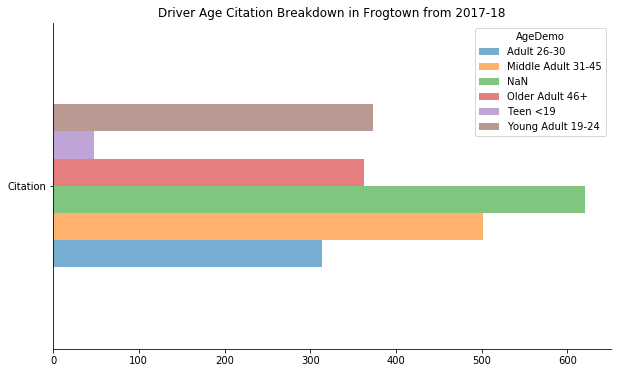

In [353]:
#Age Breakdown by Citation
#bf= rf.query("AgeDemo != 'NaN'")
Features= ['Citation','AgeDemo']
B= rf[Features].groupby(['AgeDemo']).sum()
B=B.transpose()

#print(B)
ax=B.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Driver Age Citation Breakdown in Frogtown from 2017-18')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


**Insights**

Recall in Frogtown the racial distribution is 1/3 Black, 1/3 Asian, and 1/5 white. With that said there is greater proportion of both Black and White drivers being stopped.

* Blacks were stopped the most and by proportion have greater likelihood of being stopped for equipment violation ( 
* Asians were stopped less respect to their proportional population
* Blacks were less likely to recieve citations despite being pulled over frequently
* White drivers were more likely to recieve a citation for moving violations compared to other groups
* Black drivers are searched much often than their peers despite low citations count
* Female drivers via proportion are less likely to be stopped; though white females have the highest proportion
* There are considerably more Equipment violations during latenight than in the morning and less Moving Violations
* The citation rates are much higher during the daytime vs the nighttime. This makes sense because there is less drivers during late night. Though 1/3 of stops occur during latenight.
* For the age distribution, nearly 1/3 of citations don't have the driver's age. Based on the available data, middle aged adults are most likely to get citations.


### Time Based Analysis

I will be checking out patterns for month, day of the week, and time of hour.

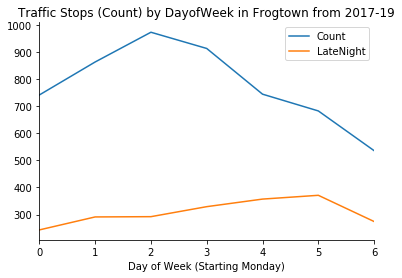

In [20]:
#Traffic Stops by Day of Week (Count)

Features= ['Count','LateNight','DayofWeek']
B= rf[Features].groupby(['DayofWeek']).sum()  #group by Function

#print(B)
ax=B.plot(kind='line')

plt.title('Traffic Stops (Count) by DayofWeek in Frogtown from 2017-19')
plt.ylabel('')
plt.xlabel('Day of Week (Starting Monday)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

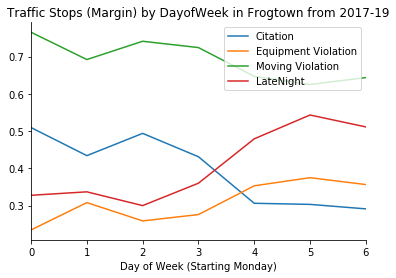

In [19]:
#Traffic Stops by Day of Week

Features= ['Count','Citation','Equipment Violation','Moving Violation','LateNight','DayofWeek']
B= rf[Features].groupby(['DayofWeek']).sum()  #group by Function
B=B.div(B['Count'].values,axis=0) #divide by count to get normalization
B.drop(B.columns[[0]], axis=1, inplace=True) #drop first group

#print(B)
ax=B.plot(kind='line')

plt.title('Traffic Stops (Margin) by DayofWeek in Frogtown from 2017-19')
plt.ylabel('')
plt.xlabel('Day of Week (Starting Monday)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

* The traffic stops are most frequent on Tuesday and less on the weekend
* Late Night traffic stops increases on the weekend days includes Friday (makes sense)
* There seems to be strong correlation between moving violation and number of citations
* There seems to be strong correlation between equipment violation and latenight traffic stops
* Less citations by proportion is less during the weekend

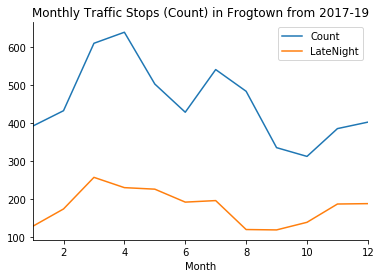

In [21]:
#Traffic Stops by Month

Features= ['Count', 'LateNight','Month']
B= rf[Features].groupby(['Month']).sum()

#print(B)
ax=B.plot(kind='line')

plt.title('Monthly Traffic Stops (Count) in Frogtown from 2017-19')
plt.ylabel('')
plt.xlabel('Month')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

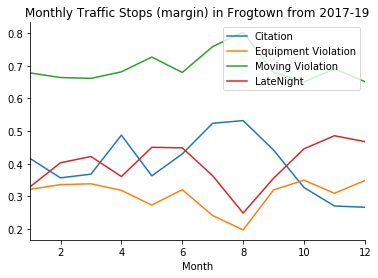

In [22]:
#Traffic Stops by Month

Features= ['Count','Citation','Equipment Violation','Moving Violation','LateNight','Month']
B= rf[Features].groupby(['Month']).sum()
B=B.div(B['Count'].values,axis=0)
B.drop(B.columns[[0]], axis=1, inplace=True)

#print(B)
ax=B.plot(kind='line')

plt.title('Monthly Traffic Stops (margin) in Frogtown from 2017-19')
plt.ylabel('')
plt.xlabel('Month')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

* There is less traffic stops during the winter months, and steadily more on Spring and Fall
* There is a significant drop on Equipment and Latenight traffic stops during the summer month
* There is an increase proportion of moving violations and citations during the summer months
* Less citiations are given Late Fall and early Winter

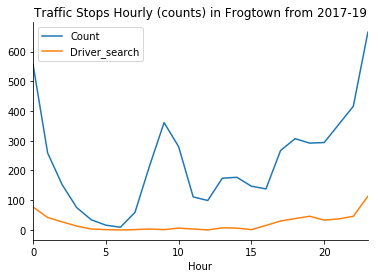

In [23]:
#Traffic Stops by Hour

Features= ['Count','Driver_search','Hour']
B= rf[Features].groupby(['Hour']).sum()
#print(B)
ax= B.plot(kind='line')

plt.title('Traffic Stops Hourly (counts) in Frogtown from 2017-19')
plt.ylabel('')
plt.xlabel('Hour')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

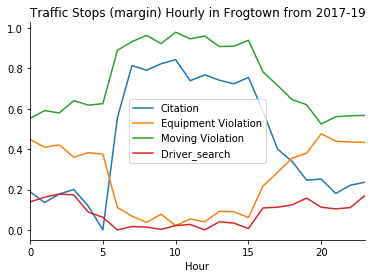

In [24]:
#Traffic Stops by Hour

Features= ['Count','Citation','Equipment Violation','Moving Violation','Driver_search','Hour']
B= rf[Features].groupby(['Hour']).sum()
B=B.div(B['Count'].values,axis=0)
B.drop(B.columns[[0]], axis=1, inplace=True)
#print(B)
ax= B.plot(kind='line')

plt.title('Traffic Stops (margin) Hourly in Frogtown from 2017-19')
plt.ylabel('')
plt.xlabel('Hour')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

* There are signficiant more traffic stops during the night hours
* Moving violations during the day, Equipment violations during the night
* Very high frequency of citations during the daytime hour matched with moving violations

## Longitudinal Analysis of Frogtown <a name="longitudinal"></a>

The full dataset ranges from 2001 to 2018 and has many missing components. For some years, 50% of the data collected are missing key information. The 'total count' will includes all instances of traffic stops in Frogtown even if there is missing supplmental information. Note the sum function ignores missing values.

In [25]:
#Data Prep

#From the masterdataset get subsample
long= results_df.query('Grid in [87.0,88.0,89.0,67.0,68.0,90.0,91.0,92.0]')

#Add Time Variables
long['Date']= pd.to_datetime(long['Date'])
long['DayofWeek']=long['Date'].dt.dayofweek
long['Weekend'] = long['DayofWeek'].apply(lambda x: 1 if (x>4)  else 0)
long['Month'] = long['Date'].dt.month
long['Day'] = long['Date'].dt.day
long['Hour'] = long['Date'].dt.hour
long['LateNight'] = long['Hour'].apply(lambda x: 1 if (x>21 or x<5)  else 0)

#Screening
long=long.query("Race!='No Data'")
long=long.query("Driver_search !='No Data'")
long=long.query("Gender !='No Data'")

#Replace variables with dummies
long['Driver_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
long['Vehicle_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
long['Citation'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
long['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) #FEMALE is 1
long[['Driver_search','Gender']] = long[['Driver_search', 'Gender']].astype(int)
long= pd.concat([long,pd.get_dummies(long['Reason'])], axis=1)
long= pd.concat([long,pd.get_dummies(long['Race'])], axis=1)

FG_long= long

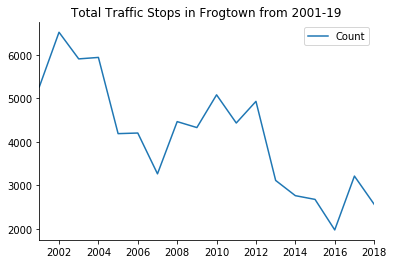

In [30]:
#Line Graph Total Stops In Frogtown

Features= ['Count','Year']
B= FG_long[Features].groupby(['Year']).sum()
ax= B.plot(kind='line')

plt.title('Total Traffic Stops in Frogtown from 2001-19')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


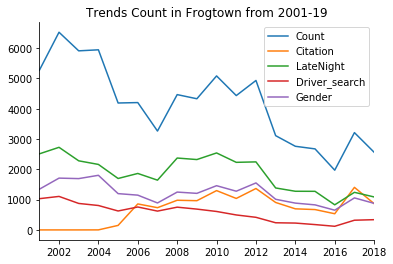

In [29]:
#Line graph COunt

Features= ['Count','Citation','LateNight','Driver_search','Gender','Year']
B= FG_long[Features].groupby(['Year']).sum()  #group by Function

#print(B)
ax= B.plot(kind='line')

plt.title('Trends Count in Frogtown from 2001-19')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


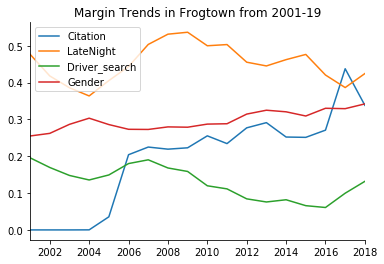

In [28]:
#Line Graph Margin

Features= ['Count','Citation','LateNight','Driver_search','Gender','Year']
B= FG_long[Features].groupby(['Year']).sum()  #group by Function
B=B.div(B['Count'].values,axis=0) #divide by count to get normalization
B.drop(B.columns[[0]], axis=1, inplace=True) #drop first group

#print(B)
ax= B.plot(kind='line')

plt.title('Margin Trends in Frogtown from 2001-19')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


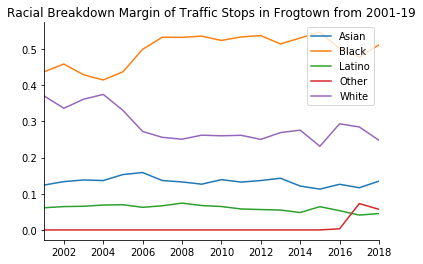

In [31]:
Features= ['Count','Asian','Black','Latino','Other','White','Year']
B= FG_long[Features].groupby(['Year']).sum()  #group by Function
B=B.div(B['Count'].values,axis=0) #divide by count to get normalization
B.drop(B.columns[[0]], axis=1, inplace=True) #drop first group

#print(B)
ax= B.plot(kind='line')

plt.title('Racial Breakdown Margin of Traffic Stops in Frogtown from 2001-19')
plt.ylabel('')
plt.xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

**Preliminary Longitudinal Analysis:**

* There was plenty of past data that indicate a traffic, but there was no information given.Thus the graphs presented are missing many datapoints and can provide a skewed a picture
* At around 2004 to 2005, a change of data practice/collections probably occured
* The Citation rate has increased in the last couple of years
* The racial demogrpahic of traffic stops have been steady with Blacks being overrepresentated despite some demographic shift in the neighborhood
* Driver search rate has declined over time

## Commercial Insight/Analysis <a name="commerical"></a>

I will be using the Four-Square API to get the nearby venues, within the radius of each police grid. I've separated the venue into three categories of interest. The map below indicates the venues within Frogtown (Upon running it again, I may have exhausted my queries):

* Green indicates Restaurant
* Blue indicates Bars
* Yellow indicates Convenience/Corner Stores


In [113]:

#Function that extracts information of many neighborhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)
    

In [62]:
#Simplify the table
ab=rf.groupby(['Grid','Latitude','Longitude'], as_index=False).count()
Features= ['Grid','Latitude','Longitude']
ab= ab[Features]

# Get the location of Venues for bunch of locations 
Frogtown_venues = getNearbyVenues(names=ab['Grid'],
                                   latitudes=ab['Latitude'],
                                   longitudes=ab['Longitude']
                                  )

Bar= ['Dive Bar','Bar','Liquor Store']
Restaurant= ['Asian Restaurant', 'Thai Restaurant','Ethiopian Restaurant',' Vietnamese Restaurant','Middle Eastern Restaurant'\
            ,'Chinese Restaurant','Ramen Restaurant','BBQ Joint','Fast Food Restaurant','Noodle House','Restaurant','Café']
Convenience= ['Convenience Store','Grocery Store']

#Select on mutiple values
Frogtown_venuesB= Frogtown_venues.loc[Frogtown_venues['Venue_Category'].isin(Bar)]
Frogtown_venuesR= Frogtown_venues.loc[Frogtown_venues['Venue_Category'].isin(Restaurant)]
Frogtown_venuesC= Frogtown_venues.loc[Frogtown_venues['Venue_Category'].isin(Convenience)]



67.0
68.0
87.0
88.0
89.0
90.0
91.0
92.0


In [64]:
Frogtown_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          67.0              44.966603              -93.141545   
1          67.0              44.966603              -93.141545   
2          67.0              44.966603              -93.141545   
3          67.0              44.966603              -93.141545   
4          67.0              44.966603              -93.141545   

                      Venue  Venue_Latitude  Venue_Longitude  \
0             Half Time Rec       44.970362       -93.143015   
1               Tobasi Stop       44.963243       -93.139395   
2   Pro-Image Beauty School       44.963986       -93.140867   
3         Minnehaha Liquors       44.963355       -93.140359   
4  Sunrise Creative Gourmet       44.964883       -93.137208   

      Venue_Category  
0           Dive Bar  
1  Convenience Store  
2     Cosmetics Shop  
3       Liquor Store  
4             Market

In [366]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

#Create Frogtown GeoMap
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")

# For Bars    
for lat, lng, borough, neighborhood in zip(Frogtown_venuesB['Venue_Latitude'], Frogtown_venuesB['Venue_Longitude'],Frogtown_venuesB['Venue'], Frogtown_venuesB['Venue_Category']):
    label = '{}, {}'.format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(FG_map)  

#Convenice Stores    
for lat, lng, borough, neighborhood in zip(Frogtown_venuesC['Venue_Latitude'], Frogtown_venuesC['Venue_Longitude'],Frogtown_venuesC['Venue'], Frogtown_venuesC['Venue_Category']):
    label = '{}, {}'.format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(FG_map)  

# Restaurants    
for lat, lng, borough, neighborhood in zip(Frogtown_venuesR['Venue_Latitude'], Frogtown_venuesR['Venue_Longitude'],Frogtown_venuesR['Venue'], Frogtown_venuesR['Venue_Category']):
    label = '{}, {}'.format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(FG_map)  
    
    
FG_map    
    

The graph above shows the stores within the Frogtown area. University Avenue has concentrated traffic. There are some neighborhood bars and convenience near the residential homes, we'll see a clearer picture with geo-spatial data

# Geo-Graphing Prep <a name="geo_prep"></a>

The Saint Paul Police department have a [json file](https://information.stpaul.gov/Public-Safety/Saint-Paul-Police-Grid-Shapefile/ykwt-ie3e) that maps out the police grid.

To prepare the data for geo-spatial information, I would need to group by grid. I changed the variables to dummies early on, so I can sum them up during aggregation. 

For the neighborhood visualizations, I took in data from the Census on racial distribution  

In [129]:
sp_geo1

'https://information.stpaul.gov/resource/kkd6-vvns.geojson'

In [32]:
#import Programs and police grid
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

sp_geo = r'Geo-Json\Saint Paul Police Grid - Shapefile.geojson'

#Socrata API IS NOT that good
#sp_geo= 'https://information.stpaul.gov/resource/xfxz-iqwn.json'

# Programmer Note: One of the challenges to get appropiate connection was to set the attribute Grid to be json value gridnum. 

In [33]:
#All of Saint Paul Grid

# The graph is determined by Grid so we will group along that
Features= ['Grid','Count','Citation','Equipment Violation','Moving Violation','Driver_search','Vehicle_search','LateNight',\
          'Asian','Black','Latino','White','Other','Gender','Weekend']

# Create a sum and divide by Count; and 
B= df[Features].groupby(['Grid']).sum()

#Save Sum Values
C= B[['Count','Citation','Equipment Violation','Moving Violation','LateNight']]

#Divide by Count and then add new columns in tranformed table
B=B.div(B['Count'].values,axis=0)
B['Count']=C.iloc[:,0] 
B['Citation_count'] = C.iloc[:,1]
B['Equipment Violation_count'] = C.iloc[:,2]
B['Moving Violation_count'] = C.iloc[:,3]
B['LateNight_count'] = C.iloc[:,4]

# The GRID needs to follow exactly like the json file
B=B.reset_index()
B.Grid = B.Grid.astype(int)
B.Grid = B.Grid.astype(str)
#print(B.head())



In [34]:
#Frogtown Only:
#FROGTOWN Value
F= rf[Features].groupby(['Grid']).sum()
C= F['Count']
F=F.div(F['Count'].values,axis=0)
F['Count']=C 

# The GRID needs to follow exactly like the json file
F=F.reset_index()
F.Grid = F.Grid.astype(int)
F.Grid = F.Grid.astype(str)


In [35]:
#Add  demographic Data
SPDem = pd.read_csv('Data\MSP Neighborhoods_2013-2017.csv', skiprows=[1])
SPDem.columns = SPDem.columns.str.replace(' ', '')
SPDem['City'].value_counts().to_frame()

#Get Saint Paul only
SPDem= SPDem.query('City in ["St. Paul"]')
#SPDem.columns.values[i]

#for i,square in enumerate(SPDem.columns.values): 
#    print(str(i) + ' '+ square)
#print(SPDem)

#Specify columns of interest
SPDem = SPDem.iloc[:,[1,2,27,39,43,47,63,71,107,123,127,131,135,159,215,243,267,271,275,279,363,370,374,378,\
                       382,386,390,394,399,403,471,475,479,495,511,515,519,523]]
col_names= ['TotHH','Neigh','Unemploy','<HighSDip','HighSDip','AssDeg','BacDeg+','Foreign%','Child<18','Inc<35k','Inc_35to50','Inc_50to75','Inc75to100','Age65+','Renter','LangNotEng','Age18_24','Age25_34','Age35_44','Age45_54','Male','Race_Black','Race_Native','Race_Asian','Race_Other','Race_Two+','Race_His','Race_White','Race_POC','Poverty','Poverty_At','Poverty_100to150','Poverty_150to200','CarOwn','Commute<10','Commute_10to19','Commute_20-29','Commute_30+']
SPDem.columns= col_names

#Rename certain values so they can be matched/merged correctly with the other dataframe.
SPDem.Neigh.unique()
SPDem.iat[2,1] = 'Capital'
SPDem.iat[4,1] = 'Thomas'
SPDem.sort_values(['Neigh'],inplace=True)
SPDem =SPDem[['Race_White','Race_Black','Race_Asian']]


In [36]:
#All of SaintPaul Neighborhood

# The graph is determined by Grid so we will group along that
Features= ['Community','Count','Citation','Equipment Violation','Moving Violation','Driver_search','Vehicle_search','LateNight',\
          'Asian','Black','Latino','White','Other','Gender','Weekend']

# Create a sum and divide by Count; and 
N= df[Features].groupby(['Community']).sum()

#Save Sum Values
C= N[['Count','Citation','Equipment Violation','Moving Violation','LateNight']]

#Divide by Count and then add new columns in tranformed table
N=N.div(N['Count'].values,axis=0)
N['Count']=C.iloc[:,0] 
N['Citation_count'] = C.iloc[:,1]
N['Equipment Violation_count'] = C.iloc[:,2]
N['Moving Violation_count'] = C.iloc[:,3]
N['LateNight_count'] = C.iloc[:,4]

# Add the demographic info!
N['White_Demo']= SPDem.iloc[:,0].values #.values was used
N['Black_Demo']= SPDem.iloc[:,1].values 
N['Asian_Demo']= SPDem.iloc[:,2].values 
N=N.reset_index()

#Merging two dataframes; where you create a distinct dataframe of just grid and community, then merge to neighbrhood file
A= df.groupby(['Grid','Community']).size().reset_index(name='Blah')
#A= df[['Grid','Community',]].groupby('Community').reset_index()
C=A
N=pd.merge(N, C, on='Community')

# The GRID needs to follow exactly like the json file
N=N.reset_index()
N.Grid = N.Grid.astype(int)
N.Grid = N.Grid.astype(str)


## Frogtown Geo-Spatial Data <a name="fg_geo"></a>

### Total Traffic Incidents in Frogtown by Grid

In [37]:
#Create Frogtown GeoMap
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")


# I've included the markers from previous graph    
for lat, lng, borough, neighborhood in zip(Frogtown_venues['Venue_Latitude'], Frogtown_venues['Venue_Longitude'],Frogtown_venues['Venue'], Frogtown_venues['Venue_Category']):
    label = '{}, {}'.format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.1,
        parse_html=False).add_to(FG_map)       
    

FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','Count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Traffic Stops',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)


# display map
FG_map

NameError: name 'Frogtown_venues' is not defined

### Citation Margin in Frogtown by Grid

In [133]:
#sp_geo = r'Geo-Json\Saint Paul Police Grid - Shapefile.geojson'

FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','Citation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Citation Margin',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Equipment Violation Margin in Frogtown by Grid

In [38]:
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','Equipment Violation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Equipment Violation Margin',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### LateNight Traffic Stop Margin in Frogtown by Grid

In [39]:
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','LateNight'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='LateNight Stop Margin',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Driver Searched Margin In Frogtown

In [40]:
FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
FG_map.choropleth(
    geo_data=sp_geo,
    data=F,
    columns=['Grid','Driver_search'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Driver Search Margin',
    highlight= True,
    name= 'Clean Map'   
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Frogtown Summary Stats

* For total incidents, high volume of incidents are around University ave around Dale
* The citation margin is not too high even in the spaces where there is greater frequency of stops
* The Equipment Violation density is high and located in the same high density rate
* The LateNight Stop Margin is really high in the University area and the vehicle search rate is also high


## Saint Paul Geospatial Data <a name="sp_geo"></a>

* For margin specifications, a police grid must have more than 100 total traffic stops. A smaller number creates bigger imbalance on margins
* The downtown district was excluded when graphing total numbers under grid data because it has very high frequency of stops; influencing the legend gradient.
* The data is from 2017 to 2018.
* There is one police grid that has zero traffic stops (try to find it)

### Total Traffic Incidents in Saint Paul by Neighborhood

In [41]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','Count'],
    #nan_fill_color='purple',
    #nan_fill_opacity=0.4,
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Traffic Stops',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Total Traffic Incidents in Saint Paul by Grid

In [42]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

#messed_up_data.loc[4, 'Count'] = float('nan')
C=B.query('Count < 2000')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Count'],
    #nan_fill_color='purple',
    #nan_fill_opacity=0.4,
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Traffic Stops',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Total Citation Count in Saint Paul by Grid

In [43]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count < 2000')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Citation_count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Citation Counts',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Citation Margin in Saint Paul by Neighborhood

In [44]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','Citation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Citation Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Citation Margin in Saint Paul by Grid

In [45]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count > 100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Citation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Citation Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Equipment Violation Count in Saint Paul by Grid

In [46]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count < 2000')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Equipment Violation_count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Equipment Violation Stops',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Equipment Violation Margin in Saint Paul by Neighborhood

In [47]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")


FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','Equipment Violation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Equipment Violation Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Equipment Violation Margin in Saint Paul by Grid

In [48]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count > 100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Equipment Violation'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Equipment Violation Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Moving Violation Count in Saint Paul by Grid

In [49]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count < 2000')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Moving Violation_count'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Moving Violation Counts',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### LateNight Traffic Stop Margin in Saint Paul by Neighborhood

In [50]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")


FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','LateNight'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='LateNight Traffic Stop Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### LateNight Traffic Stop Margin in Saint Paul by Grid

In [ ]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count > 100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','LateNight'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='LateNight Traffic Stop Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Driver Searched Margin in Saint Paul by Neighborhood

In [384]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")


FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','Driver_search'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Driver Search Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Driver Searched Margin in Saint Paul by Grid

In [430]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count >100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Driver_search'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Driver Search Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### White proportion in Saint Paul by Neighborhood(Census)

In [471]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")


FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','White_Demo'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='White Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### White Driver Margin (Diff) in Saint Paul by Neighborhood

I map out the difference between actual demographic distribution of whites from the margin white drivers. For legend, if lighter indicates over-representation and darker indicates under-representation 

In [473]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

N['Diff']= N['White_Demo']- N['White']

FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','Diff'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='White: Difference',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### White Driver Margin in Saint Paul by Grid

In [472]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count >100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','White'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='White Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Black proportion in Saint Paul by Neighborhood(Census)

In [474]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")


FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','Black_Demo'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Black Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Black Driver Margin (Diff) in Saint Paul by Neighborhood

I map out the difference between actual demographic distribution of whites from the margin white drivers. For legend, Black drivers are by default over-representated!

In [475]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

N['Diff']= N['Black_Demo']- N['Black']

FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','Diff'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Black: Difference',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Black proportion in Saint Paul by Grid

In [476]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count >100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Black'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Black Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Asian proportion in Saint Paul by Neighborhood(Census)

In [50]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")



FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','Asian_Demo'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Asian Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Asian Driver Margin (Diff) in Saint Paul by Neighborhood

I map out the difference between actual demographic distribution of whites from the margin white drivers. For legend, Asian drivers are by default underrepresentated.

In [477]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

N['Diff']= N['Asian_Demo']- N['Asian']

FG_map.choropleth(
    geo_data=sp_geo,
    data=N,
    columns=['Grid','Diff'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Asian: Difference',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

### Asian proportion in Saint Paul by Grid

In [51]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count >100')

FG_map.choropleth(
    geo_data=sp_geo,
    data=C,
    columns=['Grid','Asian'],
    key_on="feature.properties.gridnum",
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Asian Margin',
    highlight= True,
    name= 'Clean Map'
    
)
folium.LayerControl().add_to(FG_map)
                             
# display map
FG_map

**Quick Analysis**

* The Frogtown community does not have heaviest density of traffic stops, but the cluster is very apparent to nearby grids
* Despite greater frequency of traffic stops in certain areas, the margin of citations is lower
* Many lower social economic areas have more equipment violations, which is also representated by their margin
* Many drivers in lower social economic areas are searched by margin and are stopped more regularly late night



# Conclusions/Summary <a name="conclusion"></a>

After digging into the data, we get a better grasp on how traffic stops are administered and the citation rate. Within Frogtown, the data shows that movement violations are more frequent during the daytime, which have a high citation rate. During late night, equipment violation is more frequent in the community. When expanding outward to the Saint Paul, we see that traffic stops are more frequent along university avenue, which is both commerical and the light transit runs through the avenue as well. The Frogtown area have more traffic stops than their neighboring community, with greater concentration from Western Ave to Lexington Ave. Within Saint Paul, there are similar communities like Frogtown.
    
In regards to the racial question within Frogtown, Black and White drivers are over-representated, while Asians are under-representated for total citations given. Black drivers are at least twice more likely to be searched than their white counterparts for moving violations, despite having low citation rates. During the late night hours, black drivers are more likely to be stopped and have greater rates of moving violations. On the other hand, white drivers have greater citation rate during the morning time. Within gender, white female drivers get stopped. Though it's worth nothing that this can be due to the wealth gap between different racial lines. At the city level, we see that black drivers are over-representated on total traffic stops in all neighborhoods. On contrast, Asian drivers are under-representated respect to total traffic stops.
    
This report created more questions than answers. Why is there discrepancies in the data? What is the criteria for an equipment violation; does crashes count? There is simply not enough volume of 911 calls and invesitgative stops to account for the imbalance.
    
There is a lot more information that can be gleamed from the results. Please feel free to email me if you have any questions or thoughts.

Please check out the numbers for your respective community in the Appendix.



# Appendix (Neighborhood Tables)

In [44]:
Features= ['Community','Count','Citation','Equipment Violation','Moving Violation','Driver_search','Vehicle_search','LateNight',\
          'Asian','Black','Latino','White','Other','Gender','Weekend']

# Create a sum and divide by Count; and 
Ne= df[Features].groupby(['Community']).sum()

#Save Sum Values
C= Ne[['Count','Citation','Equipment Violation','Moving Violation','LateNight']]

#Divide by Count and then add new columns in tranformed table
Ne=Ne.div(Ne['Count'].values,axis=0)
Ne['Count']=C.iloc[:,0] 
Ne['Citation_count'] = C.iloc[:,1]
Ne['Equipment Violation_count'] = C.iloc[:,2]
Ne['Moving Violation_count'] = C.iloc[:,3]
Ne['LateNight_count'] = C.iloc[:,4]

Ne['White_Demo']= SPDem.iloc[:,0].values #.values was used
#print(N['White_Demo'])
Ne['Black_Demo']= SPDem.iloc[:,1].values 
Ne['Asian_Demo']= SPDem.iloc[:,2].values 
Ne=Ne.reset_index()

Ne[['Community','Count', 'Citation_count','Citation','Equipment Violation_count','Equipment Violation','Moving Violation_count','Moving Violation']].set_index('Community')



Count  Citation_count  Citation  \
Community                                               
Battle_Creek           2290            1654  0.722271   
Capital_River          4911            3423  0.697007   
Como                   1328             851  0.640813   
Dayton_Bluff           2568             934  0.363707   
Greater_East_Side      3968            2073  0.522429   
Highland_Park          3372            2960  0.877817   
Macalester_Groveland   1851            1437  0.776337   
Midway                 2476            1288  0.520194   
North_End              8561            4883  0.570377   
Payne_Phalen          12136            4185  0.344842   
St_Anthony              347             223  0.642651   
Summit_Hill             851             585  0.687427   
Summit_University      2477            1133  0.457408   
Thomas_Frogtown        5458            2219  0.406559   
Union_Park             3137            2068  0.659229   
West_7th               3038            2210  0.727452   
West_Side              1192             517  0.433725   

                      Equipment Violation_count  Equipment Violation  \
Community                                                              
Battle_Creek                              269.0             0.117467   
Capital_River                             534.0             0.108735   
Como                                      187.0             0.140813   
Dayton_Bluff                              753.0             0.293224   
Greater_East_Side                         810.0             0.204133   
Highland_Park                              76.0             0.022539   
Macalester_Groveland                      130.0             0.070232   
Midway                                    491.0             0.198304   
North_End                                1854.0             0.216563   
Payne_Phalen                             3573.0             0.294413   
St_Anthony                                 94.0             0.270893   
Summit_Hill                                74.0             0.086957   
Summit_University                         573.0             0.231328   
Thomas_Frogtown                          1654.0             0.303041   
Union_Park                                444.0             0.141536   
West_7th                                  291.0             0.095787   
West_Side                                 333.0             0.279362   

                      Moving Violation_count  Moving Violation  
Community                                                       
Battle_Creek                          2021.0          0.882533  
Capital_River                         4377.0          0.891265  
Como                                  1141.0          0.859187  
Dayton_Bluff                          1815.0          0.706776  
Greater_East_Side                     3158.0          0.795867  
Highland_Park                         3296.0          0.977461  
Macalester_Groveland                  1721.0          0.929768  
Midway                                1985.0          0.801696  
North_End                             6707.0          0.783437  
Payne_Phalen                          8563.0          0.705587  
St_Anthony                             253.0          0.729107  
Summit_Hill                            777.0          0.913043  
Summit_University                     1904.0          0.768672  
Thomas_Frogtown                       3804.0          0.696959  
Union_Park                            2693.0          0.858464  
West_7th                              2747.0          0.904213  
West_Side                              859.0          0.720638

In [45]:
Ne[['Community','Driver_search','Vehicle_search', 'Citation_count','LateNight','Gender','Weekend']].set_index('Community')

Driver_search  Vehicle_search  Citation_count  \
Community                                                             
Battle_Creek               0.032751        0.030568            1654   
Capital_River              0.029933        0.025657            3423   
Como                       0.031627        0.026355             851   
Dayton_Bluff               0.093069        0.085280             934   
Greater_East_Side          0.067288        0.059476            2073   
Highland_Park              0.002966        0.001779            2960   
Macalester_Groveland       0.012426        0.009724            1437   
Midway                     0.056139        0.049677            1288   
North_End                  0.060507        0.054433            4883   
Payne_Phalen               0.106707        0.096325            4185   
St_Anthony                 0.031700        0.023055             223   
Summit_Hill                0.029377        0.025852             585   
Summit_University          0.076302        0.070246            1133   
Thomas_Frogtown            0.100586        0.086845            2219   
Union_Park                 0.031559        0.026777            2068   
West_7th                   0.017117        0.011521            2210   
West_Side                  0.083893        0.078020             517   

                      LateNight    Gender   Weekend  
Community                                            
Battle_Creek           0.154148  0.422271  0.110480  
Capital_River          0.145795  0.411118  0.159845  
Como                   0.192018  0.430723  0.146084  
Dayton_Bluff           0.350467  0.329439  0.234813  
Greater_East_Side      0.268145  0.379788  0.165323  
Highland_Park          0.024614  0.440095  0.025504  
Macalester_Groveland   0.090762  0.416532  0.088061  
Midway                 0.252019  0.395396  0.176494  
North_End              0.242495  0.370868  0.179068  
Payne_Phalen           0.380603  0.313118  0.244150  
St_Anthony             0.391931  0.282421  0.389049  
Summit_Hill            0.125734  0.420682  0.141011  
Summit_University      0.321356  0.345176  0.251514  
Thomas_Frogtown        0.395200  0.339502  0.223342  
Union_Park             0.184252  0.384444  0.174370  
West_7th               0.108624  0.390059  0.143186  
West_Side              0.353188  0.320470  0.283557

In [46]:
Ne[['Community','Asian','Asian_Demo', 'Black','Black_Demo','White','White_Demo']].set_index('Community')

Asian  Asian_Demo     Black  Black_Demo     White  \
Community                                                                    
Battle_Creek          0.143668    0.231585  0.292140    0.203079  0.430131   
Capital_River         0.083690    0.089509  0.302993    0.132114  0.515985   
Como                  0.100151    0.054048  0.306476    0.089230  0.491717   
Dayton_Bluff          0.146417    0.323817  0.419393    0.140553  0.306075   
Greater_East_Side     0.184476    0.297678  0.336946    0.155262  0.336694   
Highland_Park         0.029359    0.071076  0.147687    0.140959  0.726572   
Macalester_Groveland  0.026472    0.037623  0.127499    0.126550  0.740681   
Midway                0.050889    0.039393  0.341276    0.020893  0.498384   
North_End             0.160963    0.355203  0.397851    0.231465  0.338512   
Payne_Phalen          0.211519    0.358401  0.400132    0.128624  0.276038   
St_Anthony            0.083573    0.112020  0.221902    0.094220  0.550432   
Summit_Hill           0.039953    0.027451  0.132785    0.050839  0.740306   
Summit_University     0.061365    0.082662  0.480420    0.324349  0.346790   
Thomas_Frogtown       0.125870    0.327318  0.492305    0.329769  0.272261   
Union_Park            0.039528    0.037718  0.259165    0.098012  0.599936   
West_7th              0.035879    0.029926  0.180053    0.108826  0.689928   
West_Side             0.041946    0.064984  0.281040    0.135823  0.453020   

                      White_Demo  
Community                         
Battle_Creek            0.398383  
Capital_River           0.675663  
Como                    0.762898  
Dayton_Bluff            0.348776  
Greater_East_Side       0.358690  
Highland_Park           0.652471  
Macalester_Groveland    0.768102  
Midway                  0.871761  
North_End               0.259136  
Payne_Phalen            0.307874  
St_Anthony              0.711481  
Summit_Hill             0.839548  
Summit_University       0.491559  
Thomas_Frogtown         0.223661  
Union_Park              0.772243  
West_7th                0.721428  
West_Side               0.453392

### Excess Code

In [ ]:

#Long Strect of code

#Programmer Note: The sort index made the values of the output easier to predice to allow more predictable results

#Group by Race to get count
A=round(rf['Race'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Tot_Count', A[0])
Race_Grp.set_value('Black','Tot_Count', A[1])
Race_Grp.set_value('Latino','Tot_Count', A[2])
Race_Grp.set_value('Other','Tot_Count', A[3])
Race_Grp.set_value('White','Tot_Count', A[4])

#Group by Race and Reason to get counts
A= round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Count', A[0])
Race_Grp.set_value('Black','Eq_Count', A[1])
Race_Grp.set_value('Latino','Eq_Count', A[2])
Race_Grp.set_value('Other','Eq_Count', A[3])
Race_Grp.set_value('White','Eq_Count', A[4])
Race_Grp.set_value('Asian','Mov_Count', A[5])
Race_Grp.set_value('Black','Mov_Count', A[6])
Race_Grp.set_value('Latino','Mov_Count', A[7])
Race_Grp.set_value('Other','Mov_Count', A[8])
Race_Grp.set_value('White','Mov_Count', A[9])

#Group by Race and Reason but normalized counts
A= round(rf.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Margin', A[0])
Race_Grp.set_value('Black','Eq_Margin', A[1])
Race_Grp.set_value('Latino','Eq_Margin', A[2])
Race_Grp.set_value('Other','Eq_Margin', A[3])
Race_Grp.set_value('White','Eq_Margin', A[4])
Race_Grp.set_value('Asian','Mov_Margin', A[5])
Race_Grp.set_value('Black','Mov_Margin', A[6])
Race_Grp.set_value('Latino','Mov_Margin', A[7])
Race_Grp.set_value('Other','Mov_Margin', A[8])
Race_Grp.set_value('White','Mov_Margin', A[9])

#Group by Race and Citation Counts
A=round(rf.groupby(['Race'])['Citation'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Citation_Count', A[5])
Race_Grp.set_value('Black','Citation_Count', A[6])
Race_Grp.set_value('Latino','Citation_Count', A[7])
Race_Grp.set_value('Other','Citation_Count', A[8])
Race_Grp.set_value('White','Citation_Count', A[9])

#Group by Race, Reason, and Citation Normalized Counts
A= round(rf.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Citation', A[10])
Race_Grp.set_value('Black','Eq_Citation', A[12])
Race_Grp.set_value('Latino','Eq_Citation', A[14])
Race_Grp.set_value('Other','Eq_Citation', A[16])
Race_Grp.set_value('White','Eq_Citation', A[18])
Race_Grp.set_value('Asian','Mov_Citation', A[11])
Race_Grp.set_value('Black','Mov_Citation', A[13])
Race_Grp.set_value('Latino','Mov_Citation', A[15])
Race_Grp.set_value('Other','Mov_Citation', A[17])
Race_Grp.set_value('White','Mov_Citation', A[19])

#Group by Race and Search Counts
A=round(rf.groupby(['Race'])['Driver_search'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Driversearch_Count', A[5])
Race_Grp.set_value('Black','Driversearch_Count', A[6])
Race_Grp.set_value('Latino','Driversearch_Count', A[7])
Race_Grp.set_value('Other','Driversearch_Count', A[8])
Race_Grp.set_value('White','Driversearch_Count', A[9])

#Group by Race and Citation Counts
A= round(rf.groupby(['Race','Reason'])['Driver_search'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_DriverSearch', A[10])
Race_Grp.set_value('Black','Eq_DriverSearch', A[12])
Race_Grp.set_value('Latino','Eq_DriverSearch', A[14])
Race_Grp.set_value('Other','Eq_DriverSearch', A[16])
Race_Grp.set_value('White','Eq_DriverSearch', A[18])
Race_Grp.set_value('Asian','Mov_DriverSearch', A[11])
Race_Grp.set_value('Black','Mov_DriverSearch', A[13])
Race_Grp.set_value('Latino','Mov_DriverSearch', A[15])
Race_Grp.set_value('Other','Mov_DriverSearch', A[17])
Race_Grp.set_value('White','Mov_DriverSearch', A[19])

#Group by Race,Reason, and Gender Normalized Counts
A=round(rf.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Gender_F', A[10])
Race_Grp.set_value('Black','Eq_Gender_F', A[12])
Race_Grp.set_value('Latino','Eq_Gender_F', A[14])
Race_Grp.set_value('Other','Eq_Gender_F', A[16])
Race_Grp.set_value('White','Eq_Gender_F', A[18])
Race_Grp.set_value('Asian','Mov_Gender_F', A[11])
Race_Grp.set_value('Black','Mov_Gender_F', A[13])
Race_Grp.set_value('Latino','Mov_Gender_F', A[15])
Race_Grp.set_value('Other','Mov_Gender_F', A[17])
Race_Grp.set_value('White','Mov_Gender_F', A[19])

#Group by Race,LateNight Counts
A=round(rf.groupby(['Race'])['LateNight'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','LateNight_Count', A[5])
Race_Grp.set_value('Black','LateNight_Count', A[6])
Race_Grp.set_value('Latino','LateNight_Count', A[7])
Race_Grp.set_value('Other','LateNight_Count', A[8])
Race_Grp.set_value('White','LateNight_Count', A[9])

#Group by Race,Reason, and Latenight Normalized Counts
A=round(rf.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_LateNight', A[10])
Race_Grp.set_value('Black','Eq_LateNight', A[12])
Race_Grp.set_value('Latino','Eq_LateNight', A[14])
Race_Grp.set_value('Other','Eq_LateNight', A[16])
Race_Grp.set_value('White','Eq_LateNight', A[18])
Race_Grp.set_value('Asian','Mov_LateNight', A[11])
Race_Grp.set_value('Black','Mov_LateNight', A[13])
Race_Grp.set_value('Latino','Mov_LateNight', A[15])
Race_Grp.set_value('Other','Mov_LateNight', A[17])
Race_Grp.set_value('White','Mov_LateNight', A[19])

#Group by Race,Latenight, and Citation Normalized Counts
#1/3 of data is done during latenight activities
A=round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Morn_Citation', A[10])
Race_Grp.set_value('Black','Morn_Citation', A[12])
Race_Grp.set_value('Latino','Morn_Citation', A[14])
Race_Grp.set_value('Other','Morn_Citation', A[16])
Race_Grp.set_value('White','Morn_Citation', A[18])
Race_Grp.set_value('Asian','Late_Citation', A[11])
Race_Grp.set_value('Black','Late_Citation', A[13])
Race_Grp.set_value('Latino','Late_Citation', A[15])
Race_Grp.set_value('Other','Late_Citation', A[17])
Race_Grp.set_value('White','Late_Citation', A[19])


In [ ]:
# Construct for every neighborhood

d_North_End=Race_Grp
d_West_Side=Race_Grp
d_Battle_Creek=Race_Grp
d_Dayton_Bluff=Race_Grp
d_Payne_Phalen=Race_Grp
d_Capital_River=Race_Grp
d_Union_Park=Race_Grp
d_Summit_University=Race_Grp
d_Greater_East_Side=Race_Grp
d_Thomas_Frogtown=Race_Grp
d_St_Anthony=Race_Grp
d_Summit_Hill=Race_Grp
d_Midway=Race_Grp
d_West_7th=Race_Grp
d_Como=Race_Grp
d_Highland_Park=Race_Grp
d_Macalester_Groveland=Race_Grp

A= df.Community.unique()
Dict= {A[0]:d_North_End, A[1]:d_West_Side, A[2]:d_Battle_Creek, A[3]:d_Dayton_Bluff, A[4]:d_Payne_Phalen, A[5]:d_Capital_River,
       A[6]:d_Union_Park, A[7]:d_Summit_University, A[8]:d_Greater_East_Side, A[9]:d_Thomas_Frogtown, A[10]:d_St_Anthony,
       A[11]:d_Summit_Hill, A[12]:d_Midway, A[13]:d_West_7th, A[14]:d_Como, A[15]:d_Highland_Park, A[16]:d_Macalester_Groveland}


RR= ['Asian','Black','Latino','Other','White']
for k,p in enumerate(Dict):
    rf= df[df['Community']==p]
    for i,j in enumerate(RR):
        Dict[p].set_value(j,'Tot_Count', round(rf['Race'].value_counts().sort_index(level=1),4)[i])
        Dict[p].set_value(j,'Eq_Count', round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)[i])
        Dict[p].set_value(j,'Mov_Count', round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)[i+len(RR)])

        
#print(Dict['Capital_River'])
print(Dict['West_Side'])
#DR[1]     

In [ ]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    grid_latitude, 
    grid_longitude, 
    radius, 
    LIMIT)
url # display URL

#Get respective json
results = requests.get(url).json()

# Find venues in one location
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
#nearby_venues

Frogtown_venues.head()
#Frogtown_venues.groupby('Neighborhood').count()
Frogtown_venues.Venue_Category.unique()

#Specify the Venues of interest to store and display
x=['Dive Bar', 'Convenience Store', 'Liquor Store', 'Restaurant', 'Middle Eastern Restaurant','Vietnamese Restaurant',\
   'Asian Restaurant', 'Thai Restaurant','Café','Fast Food Restaurant','Noodle House','Ethiopian Restaurant','Bar',\
   'Ramen Restaurant', 'BBQ Joint', 'Grocery Store', 'Chinese Restaurant']
#Frogtown_venues[Frogtown_venues['Venue_Category'].isin(x)]
